In [2]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.19.2
Pandas: 0.25.1
Matplotlib: 3.1.1
Seaborn: 0.9.0
Scipy: 1.3.1


In [3]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,f1_score, fbeta_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')

In [4]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('C:/Users/Vikas/PycharmProject/CreditCardDetection/dataset/creditcard.csv')

# Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Confusion matrix accuracy is not meaningful for unbalanced classification.

In [7]:
# Grab a peek at the data 
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Information :

Feature Technicalities:

1) PCA Transformation : The description of the data says that all the features went through a PCA transformation                                 (Dimensionality Reduction technique) (Except for time and amount).

2) Scaling :  Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this              case, all the V features have been scaled or at least that is what we are assuming the people that develop                the dataset did.)


In [8]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
# Print the shape of the data
#data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [10]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [11]:
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%)'.format(normal, perc_normal))
print('There were {} fraudulent transactions ({:.3f}%).'.format(fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%)
There were 492 fraudulent transactions (0.173%).


Note :
     Notice how imbalanced is our original dataset! Most of the transactions are non-fraud.
     If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors 
     and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. 
     But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [12]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
print("details of valid transaction") 
valid.Amount.describe() 


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
df=data.loc[:,['Time','Amount','Class']] #Selecting data of interest
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [15]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [16]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [17]:
df.shape

(284807, 3)

In [18]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
len(df[df['Class']==1])

492

In [20]:
len(df[df['Class']==0])

284315

In [21]:
df.isna().sum()#No null value is present

Time      0
Amount    0
Class     0
dtype: int64

# Observation

1) Except for the transaction and amount we dont know what the other columns are (due to privacy reasons). 

2) The only thing we know, is that those columns that are unknown have been scaled already.

3) The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.

4) There are no "Null" values, so we don't have to work on ways to replace values.
  Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the   dataframe.

# Visualizations

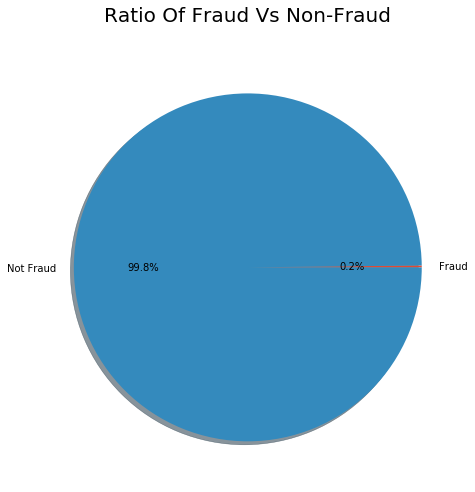

In [22]:
fraud=len(df[df['Class']==1])
nonfraud=len(df[df['Class']==0])
#Data to  plot
labels='Fraud','Not Fraud'
sizes =[fraud,nonfraud]
#Plot
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=0)
plt.title('Ratio Of Fraud Vs Non-Fraud\n',fontsize=20)
sns.set_context("paper",font_scale=2)
       

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

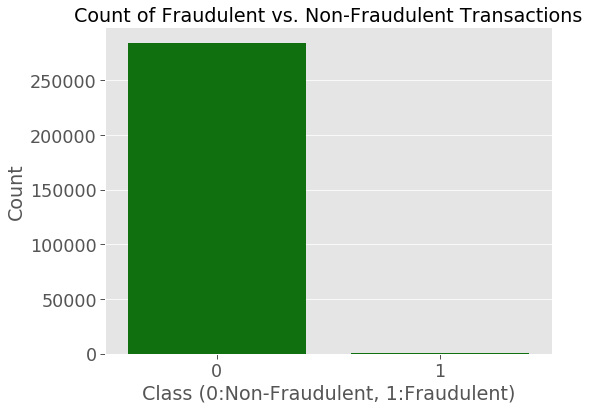

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts,color = 'green')
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

<Figure size 720x504 with 0 Axes>

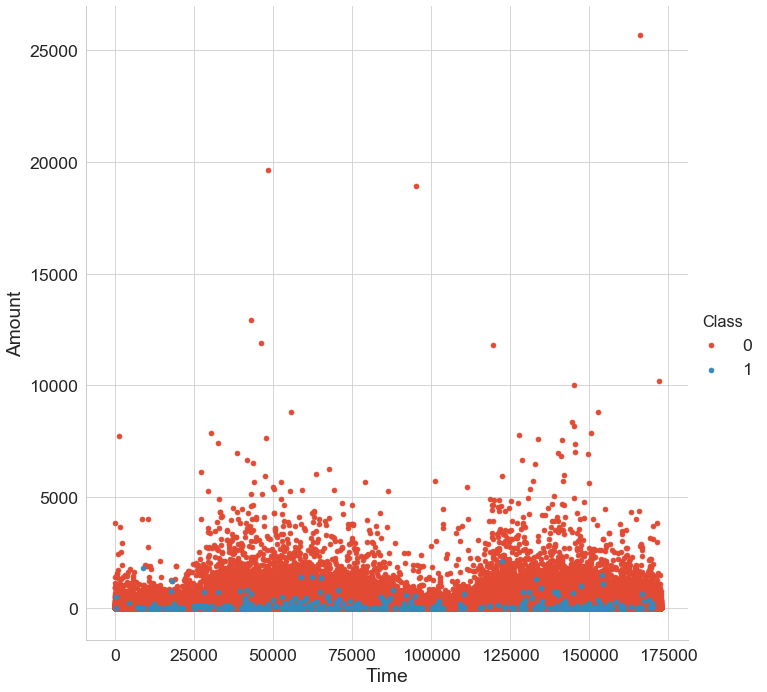

In [24]:

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class",size =10).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

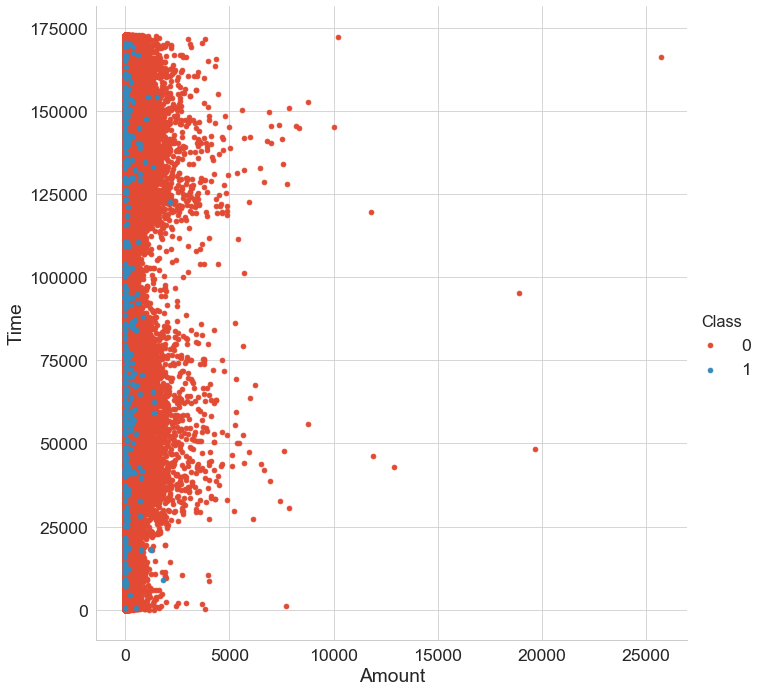

In [131]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 10).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

# Observations:

1) From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction   amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.

2) As per with the time, the frauds in the transactions are evenly distributed throughout time.


Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. 
              There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.



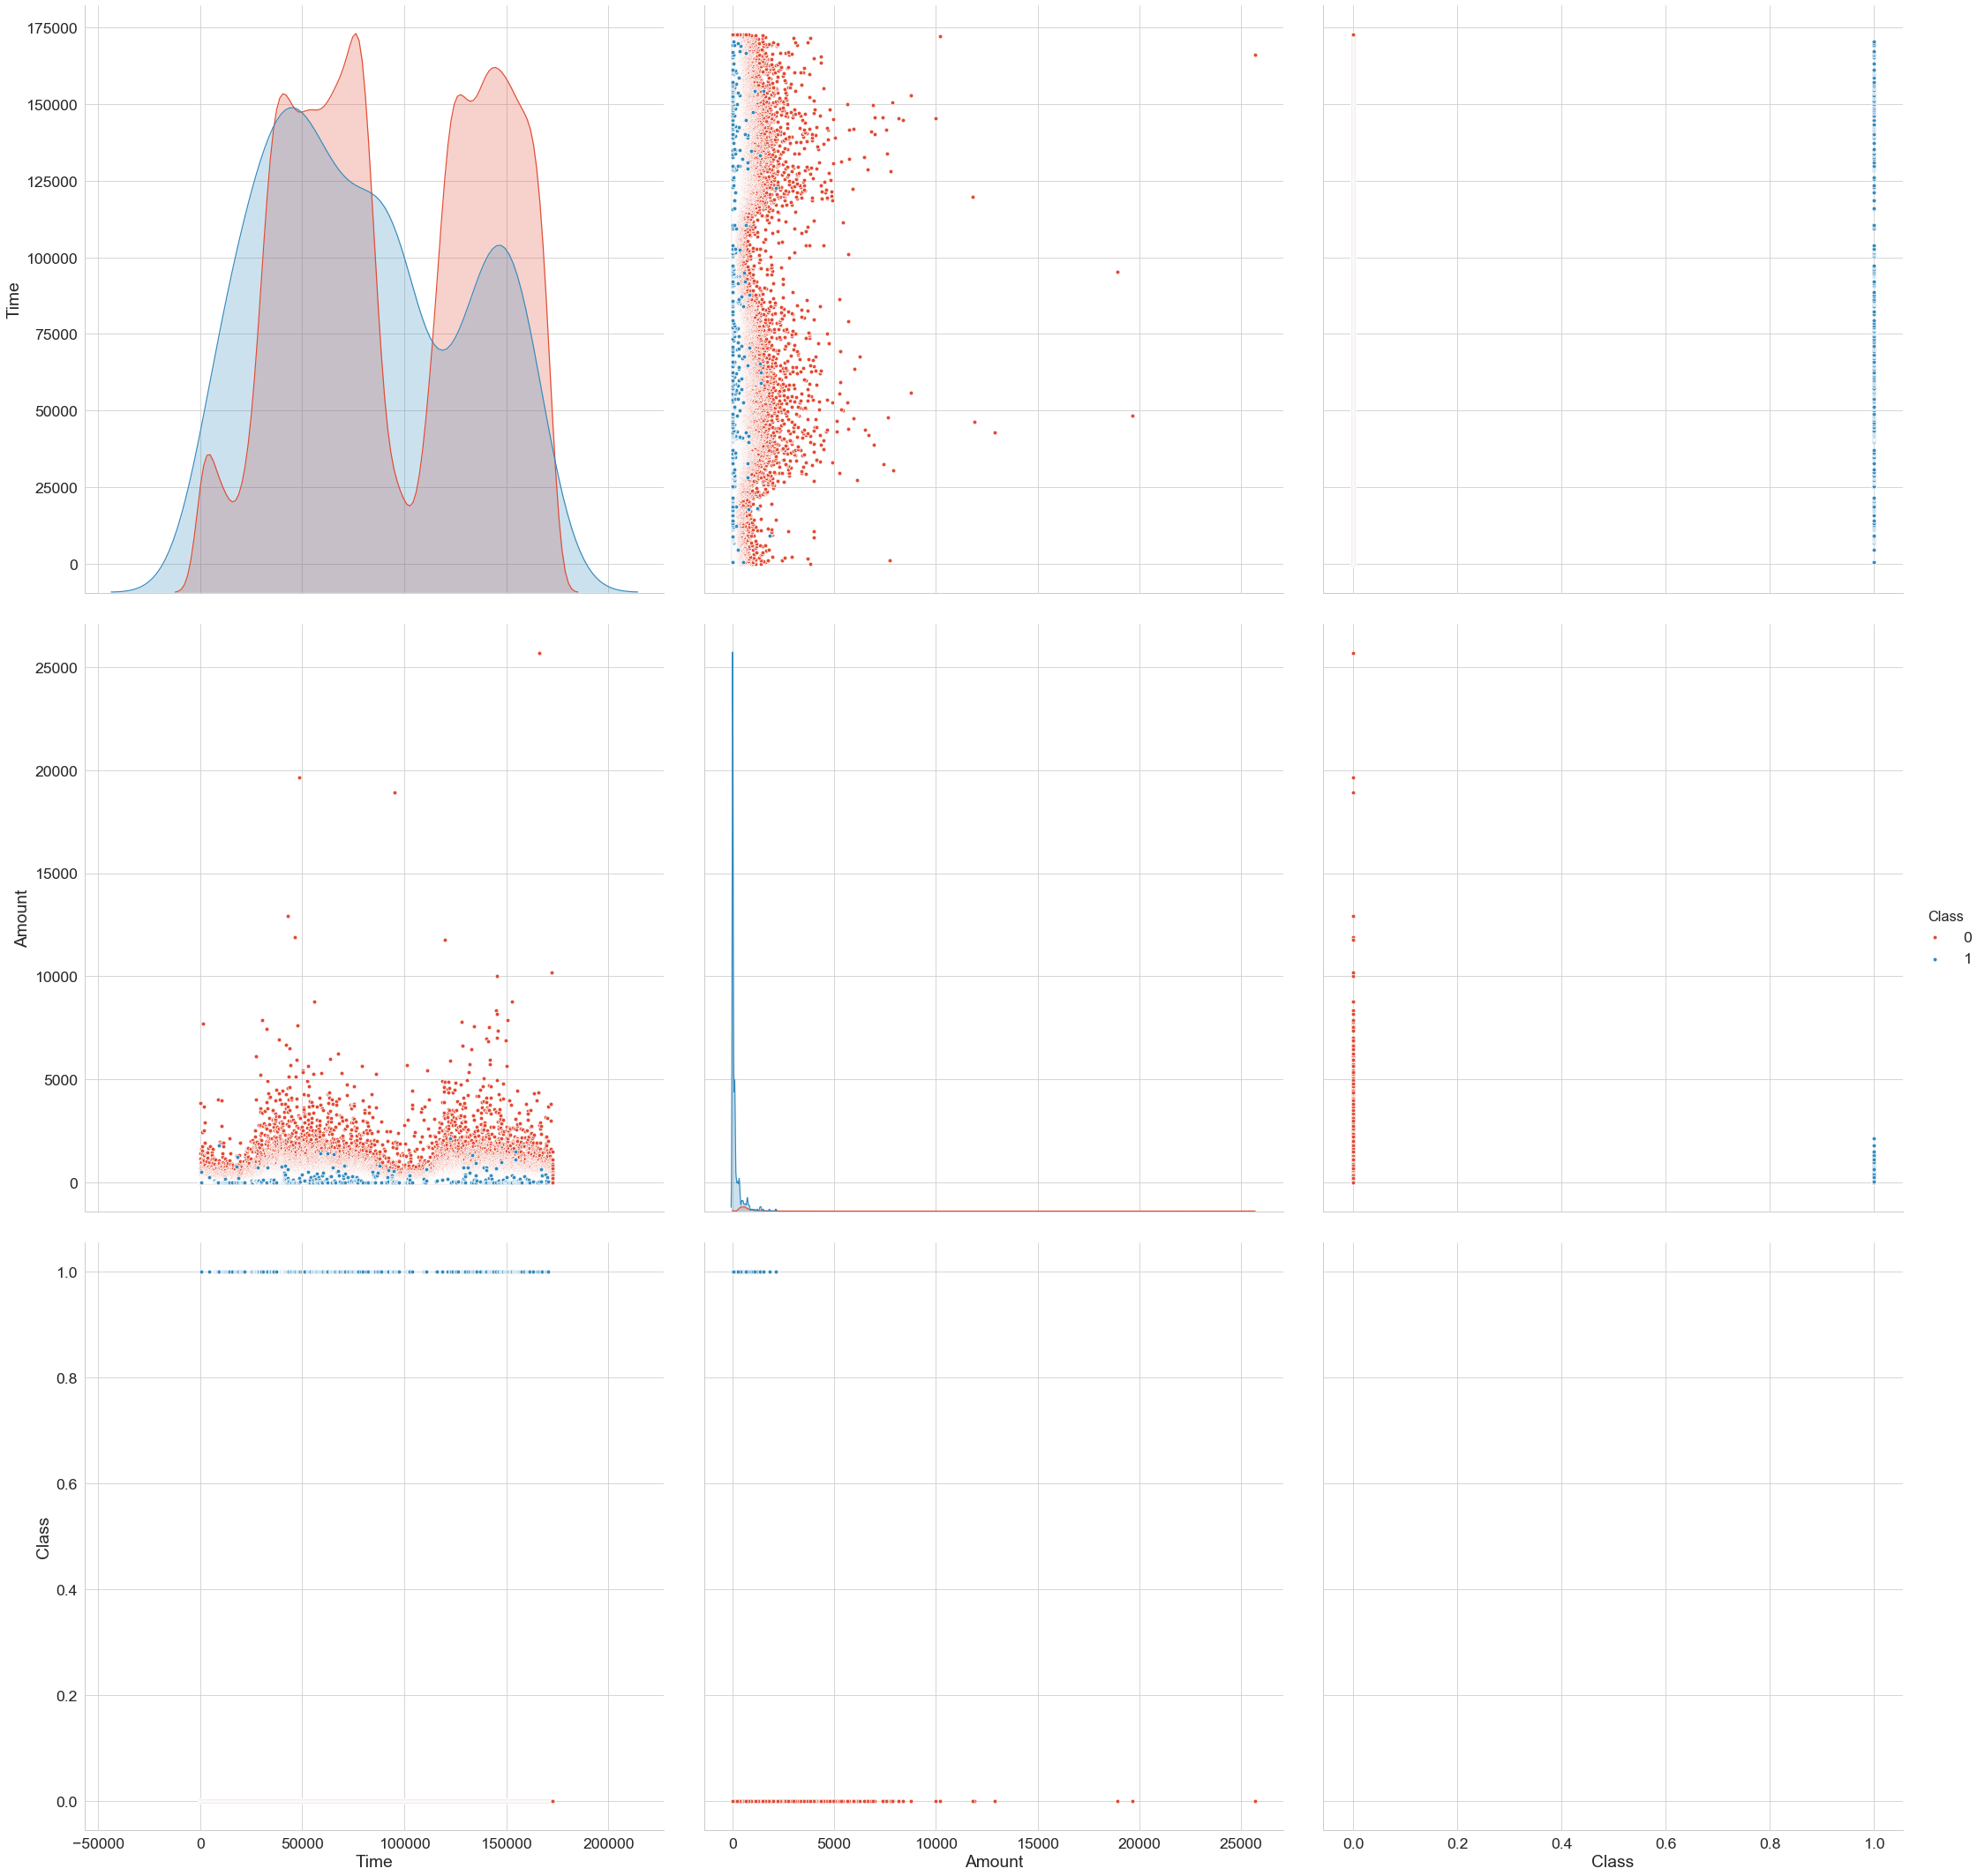

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Class", size=10);
plt.show()

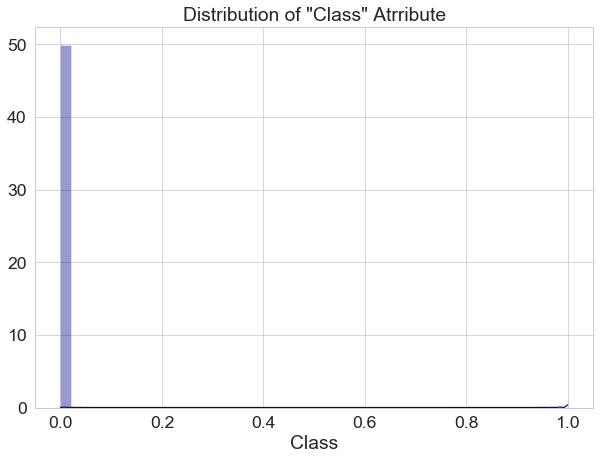

In [26]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Atrribute')

sns.distplot(df['Class'],color='#00008B');

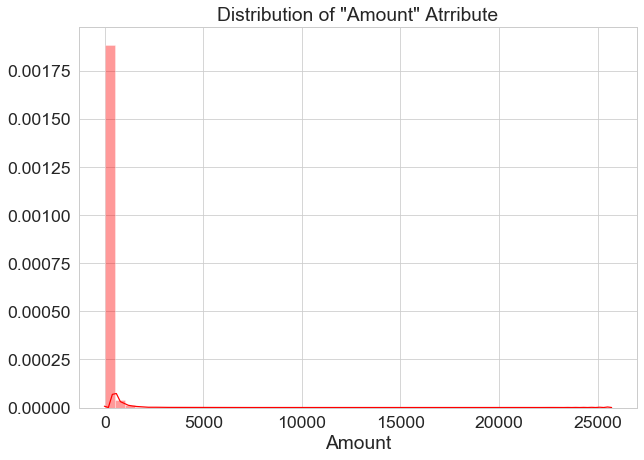

In [27]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Amount" Atrribute')

sns.distplot(df['Amount'],color='red');

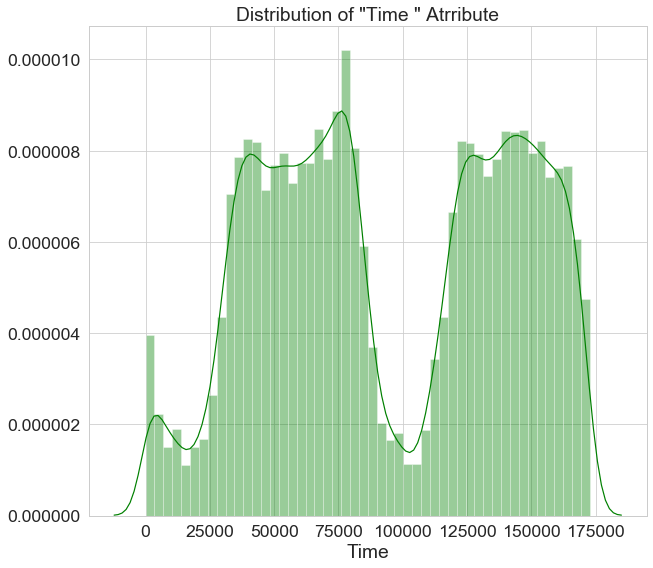

In [28]:
plt.figure(figsize=(10,9))
plt.title( 'Distribution of "Time " Atrribute')

sns.distplot(df['Time'],color='green')

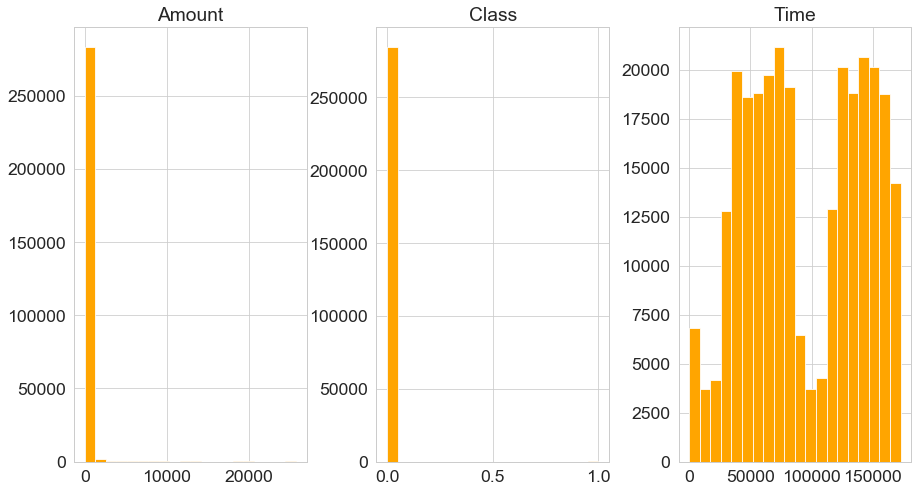

In [29]:
df.hist(bins=20, figsize=(15,8),layout=(1,3),color ='orange'); #Histrogram of All the Atrributes

# Box plot and Whiskers

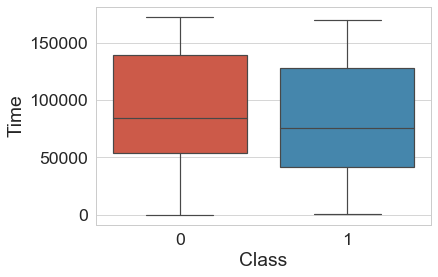

In [30]:
sns.boxplot(x = "Class", y = "Time", data = data)
plt.show()


Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.



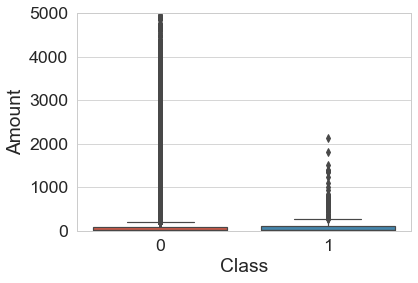

In [31]:
sns.boxplot(x = "Class", y = "Amount", data = data)
plt.ylim(0, 5000)
plt.show()



Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.



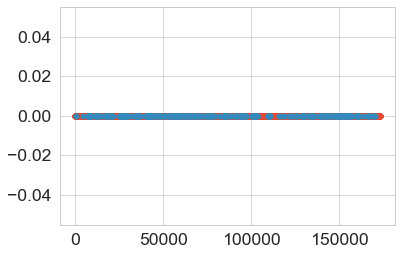

In [32]:
creditCard_genuine = df.loc[df["Class"] == 0]
creditCard_fraud = df.loc[df["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.



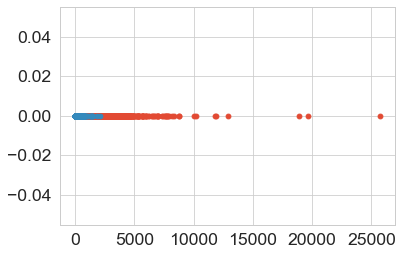

In [33]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.



# Scaling and Distributing

 Note:
 we will first scale the columns comprise of Time and Amount . 
 Time and amount should be scaled as the other columns.
 On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud 
and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a 
 fraud or not.


In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions.
Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

1) Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model                   is to be certain when a fraud occurs.

2) Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of                       this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not                         able to see the true correlations between the class and features.

# Summary:

1)Scaled amount and scaled time are the columns with scaled values.

2)There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.

3)We concat the 492 cases of fraud and non fraud, creating a new sub-sample.


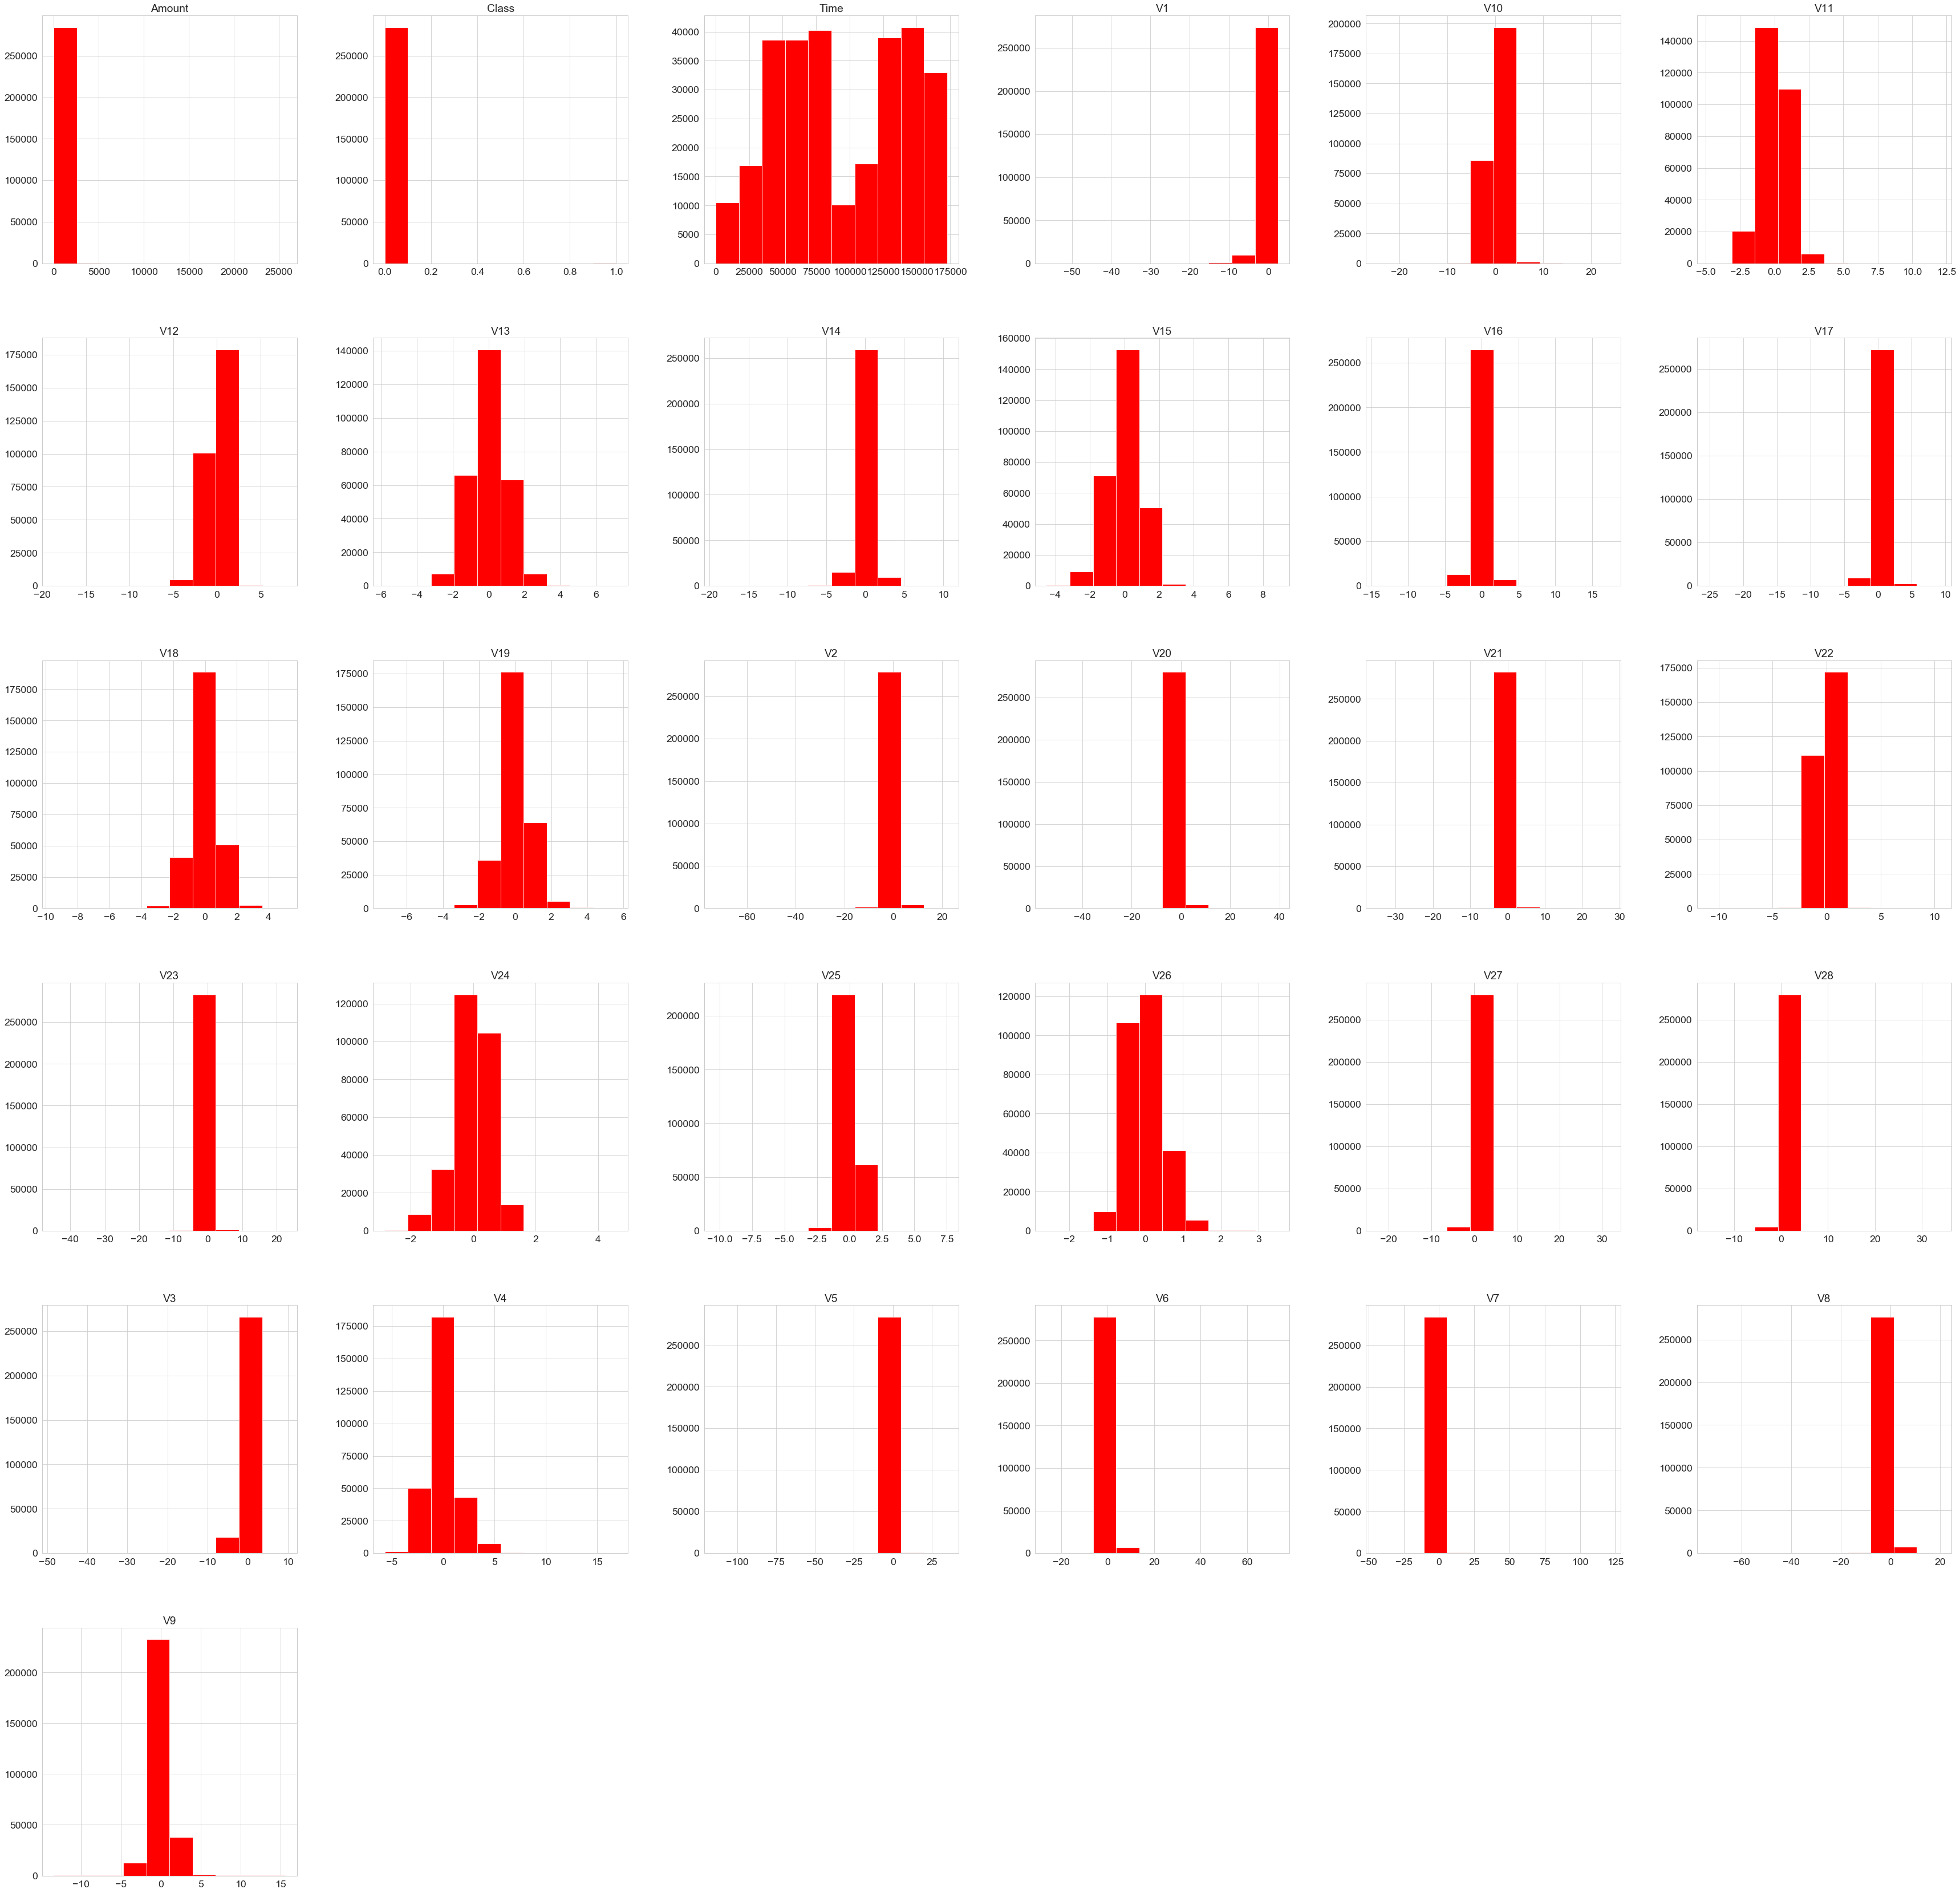

In [34]:
# Plot histograms of each parameter 
data.hist(figsize = (60, 60),color='red')
plt.show()

In [35]:
data.corr() # Very less correleation among the various attributes because of PCA

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


## Correlation matrix

 ### The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.



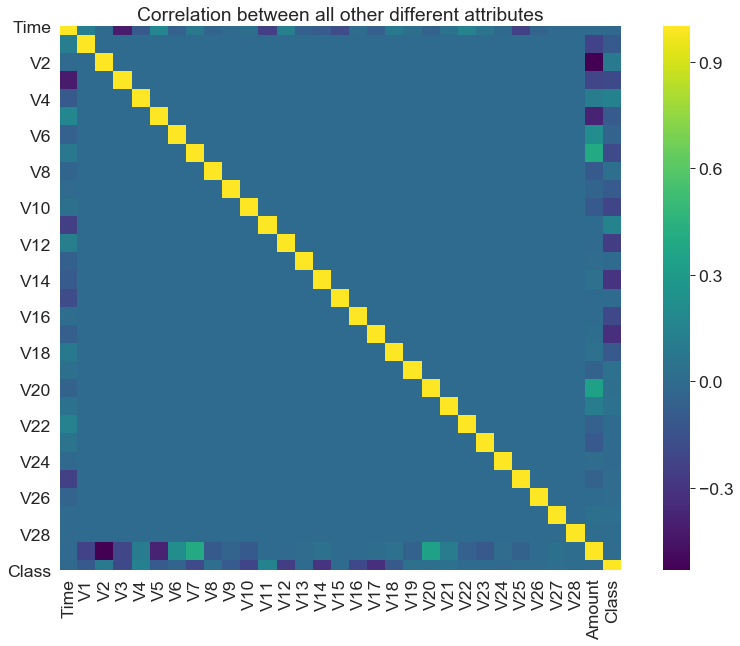

In [36]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (15, 10))

sns.heatmap(corrmat, vmax = 1, square = True,cmap='viridis')
plt.title('Correlation between all other different attributes')
plt.show()


In [37]:
#Skewness
skew_ = df.skew()
skew_

Time      -0.035568
Amount    16.977724
Class     23.997579
dtype: float64

# Observation from Above Correlation Matrix

Correlation Matrices :
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.


Summary and Explanation :


    1) Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are,
                               the more likely the end result will be a fraud transaction.

    2) Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are,
                              the more likely the end result will be a fraud transaction.
        
    3)BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fraudlent
                and non fradulent transactions.



In [38]:
df.corr()#Correlation among the various attributes

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


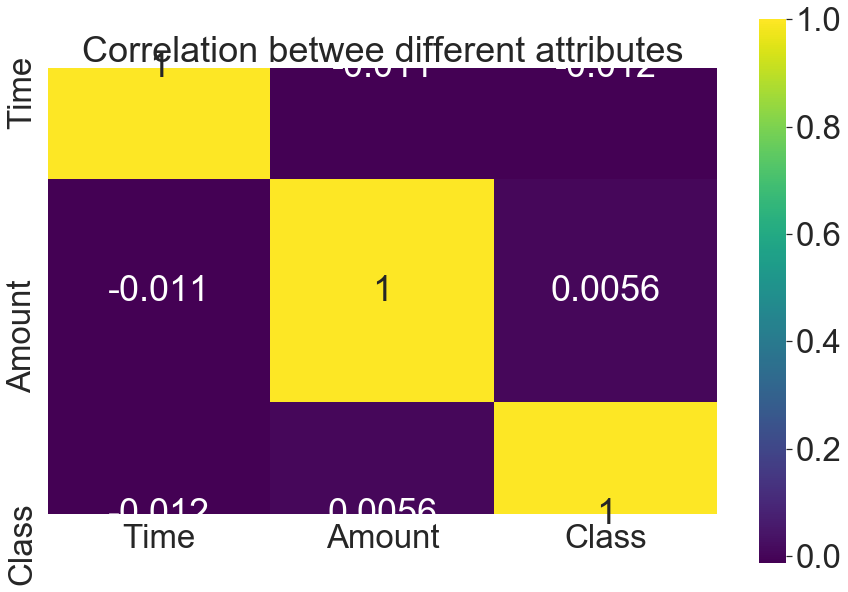

In [39]:
#very low correlation among "Time","Amount","Class"

plt.figure(figsize=(15,10))
sns.set(font_scale=3)
corrmat = df.corr()

sns.heatmap(corrmat,vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation betwee different attributes')
plt.show()

# Preparing our data for Model Building


Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.



In [40]:
# dividing the X and the Y from the dataset 
#Separating our data into Dependent and Independent Variables
X = data.drop(['Class'], axis = 1) 
Y = data["Class"]
print(X.shape) 
print(Y.shape) 

(284807, 30)
(284807,)


In [41]:
X=data.drop('Class',axis=1)
y=data['Class']

In [42]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [43]:
#concatenate our training data back together
X = pd.concat([X_train , y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
264873,161634.0,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,2.74,0
163821,116237.0,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,38.44,0
72083,54557.0,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,1.00,0
196949,131771.0,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,37.89,0
126213,77959.0,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,237.00,0


# Building a Random Forest Model using skicit learn (Unbalanced Data)

In [44]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier( ).fit(X_train,y_train)  
# predictions 
rfc_pred =rfc.predict(X_test)
#Checking unique labels
print('Unique predicted labels:',np.unique(rfc_pred))

#checking accuracy
print('Test score:',accuracy_score(y_test, rfc_pred))

Unique predicted labels: [0 1]
Test score: 0.9996207971686188


In [45]:
from sklearn.metrics import classification_report

print("Random Forest Model Classification Report")

print('....'*15)

print( classification_report(y_test,rfc_pred))

Random Forest Model Classification Report
............................................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.98      0.81      0.89       132

    accuracy                           1.00     71202
   macro avg       0.99      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [46]:
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,71068,2
1,25,107


# The Confusion Matrix:
Here is again, how the confusion matrix works:


1)Upper Left Square: The amount of correctly classified by our model of no fraud transactions.
    
2)Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud.
    
3)Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud.
    
4)Lower Right Square: The amount of correctly classified by our model of fraud transactions.


# Observation :

1) Never test on the oversampled or undersampled dataset.

2) If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!

3) Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix


# Upsampling

In [47]:
#separate minority and majority classes
from sklearn.utils import resample

not_fraud = X[X.Class==0]
fraud  = X[X.Class==1]
print(not_fraud)
print(fraud)

#upsample minority 
fraud_upsampled = resample(fraud,
                           replace=True, # sample with replacement
                           n_samples=len(not_fraud), # match number in majority class
                           random_state=27 )# reproducible results

#Combine majority and upsampled minority
upsampled =pd.concat([not_fraud, fraud_upsampled])

#Check new Class counts
upsampled.Class.value_counts()

            Time        V1        V2        V3        V4        V5        V6  \
264873  161634.0 -0.395578  1.489129 -0.833442 -0.224271  0.369444 -1.453886   
163821  116237.0  1.950487  0.002312 -1.761814  1.232470  0.523175 -0.650657   
72083    54557.0  1.105167 -0.166253  0.569520  0.681043 -0.259189  0.642792   
196949  131771.0  1.805238  0.961264 -1.717212  4.094625  0.938666 -0.227785   
126213   77959.0  0.835421 -1.191847  0.578455  0.586101 -1.236663  0.194617   
...          ...       ...       ...       ...       ...       ...       ...   
266992  162570.0 -1.953093  2.452275 -1.803928 -0.492017 -0.811395 -1.168018   
196408  131491.0  1.961992 -0.873843 -0.673987 -1.373809 -0.978681 -1.013866   
14879    26159.0  0.948754 -0.829076  0.844771  0.184600 -1.199209  0.013100   
36680    38643.0 -1.121386 -0.373823  2.081630 -0.437058 -1.147926  0.465210   
267283  162704.0  2.091808  0.533877 -2.607129  1.312930  1.347983 -0.568989   

              V7        V8        V9  .

1    213245
0    213245
Name: Class, dtype: int64

In [48]:
# Trying Logistic Regression with the Balanced Dataset

from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class',axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)


In [49]:
#Checking Accurancy
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [50]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report")

print('....'*15)

print( classification_report(y_test,upsampled_pred))

Logistic Regression Classification Report
............................................................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.87      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



In [51]:
#confusion matrix
pd.DataFrame(confusion_matrix(y_test,upsampled_pred))

,0,1
0,69717,1353
1,17,115


# DownSampling

In [52]:
#still using our separated classes fraud and not_fraud from above

#downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, #sample without replacement
                                n_samples =len(fraud),# match minority n
                                random_state =27) #reproducible results

#combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled , fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [53]:
# Trying Logistic Regression with the Balanced Dataset
from sklearn.linear_model import LogisticRegression

y_train = downsampled.Class
X_train = downsampled.drop('Class',axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [54]:
undersampled_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
#Checking Accurancy
accuracy_score(y_test, undersampled_pred)

0.9758574197354007

In [56]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report")

print('....'*15)

print( classification_report(y_test,undersampled_pred))

Logistic Regression Classification Report
............................................................
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.06      0.86      0.12       132

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202



In [57]:
#confusion matrix
pd.DataFrame(confusion_matrix(y_test,undersampled_pred))

,0,1
0,69369,1701
1,18,114


# Generate Synthetic Samples

# SMOTE(Synthetic Minority Oversampling Technique)

SMOTE is popular algorithms to creates sythetic observations of the minority class

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
#Separate input features and target
y=data.Class
X=data.drop('Class',axis=1)
print(X)

#setting up testing and training sets
X_train1 ,X_test1,y_train1,y_test1= train_test_split(X, y, test_size =0.25,random_state=27)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [60]:
sm = SMOTE(random_state =27)
X_train1, y_train1 = sm.fit_sample(X_train1, y_train1)

# Logistic Regression Model

In [61]:
smote = LogisticRegression(solver ='liblinear').fit(X_train1 ,y_train1)

smote_pred = smote.predict(X_test1)

#Checking Accurancy
accuracy_score(y_test1, smote_pred)

0.9858571388444145

In [62]:
pd.DataFrame(confusion_matrix(y_test1, smote_pred))

,0,1
0,70081,989
1,18,114


# RandomForest Classification Model

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
randf = RandomForestClassifier(n_estimators=10).fit(X_train1,y_train1)

#predict on test set
randf_pred = randf.predict(X_test1)

accuracy_score(y_test1 , randf_pred)


0.9994943962248252

In [67]:
pd.DataFrame(confusion_matrix(y_test1, randf_pred))

,0,1
0,71057,13
1,23,109


# GaussianNB

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()
gnb_best = gnb.fit(X_train ,y_train)

In [70]:
#predict on test set
gnb_pred = gnb_best.predict(X_test)


In [71]:
accuracy_score(y_test,gnb_pred)

0.9875284402123535

In [72]:
pd.DataFrame(confusion_matrix(y_test, gnb_pred))

,0,1
0,70217,853
1,35,97


# GridSearchCV -Support Vector Classifier


In [73]:
##Run CV with 5 Folds (SVM)

C=[1]
gammas = [0.001 ,0.1]
param_grid  = dict(C=C, gamma =gammas)

svm1 =svm.SVC(kernel ='rbf',probability=True)
svm_grid = GridSearchCV(svm1 , param_grid ,cv =5,scoring ='roc_auc',verbose=10, n_jobs=-1)
svm_grid.fit(X_train ,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   39.1s remaining:   39.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   40.1s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.1s finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001, 0.1]}, scoring='roc_auc',
             verbose=10)

In [74]:
#predict on test set
grid_pred =svm_grid.predict(X_test)

In [76]:
accuracy_score(y_test,grid_pred)

0.9465324007752591

In [77]:
pd.DataFrame(confusion_matrix(y_test, grid_pred))

,0,1
0,67357,3713
1,94,38


# Also Consider Using RandomizedSearchCV 

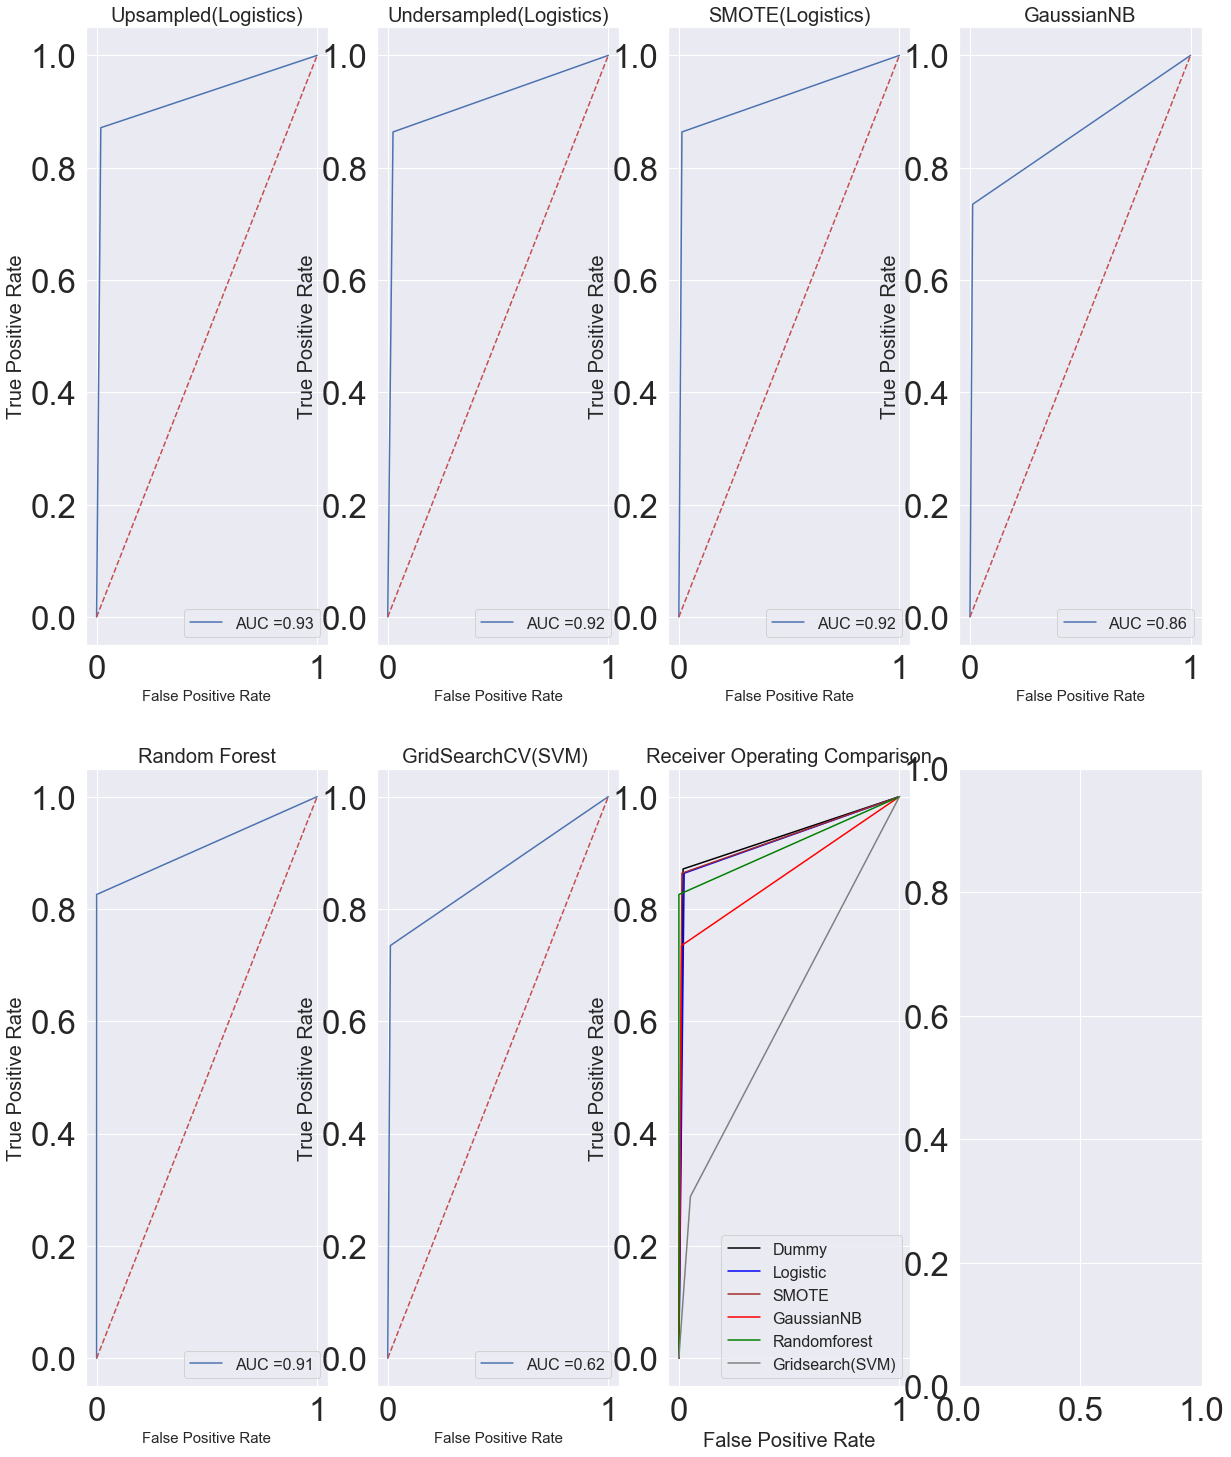

In [82]:

fig ,ax_arr =plt.subplots(nrows = 2, ncols = 4,figsize =(20,25) )

#--------------------------Upsampled--------------------------------------


upsampled_pred = upsampled.predict(X_test)
fprdm,tprdm ,thresholddm = metrics.roc_curve(y_test,upsampled_pred)
roc_aucxgb= metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm, tprdm,'b',label ='AUC =%0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0,1],[0,1],'r--')
ax_arr[0,0].set_title('Upsampled(Logistics)' ,fontsize =20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize= 20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize= 15)
ax_arr[0,0].legend(loc ='lower right',prop={'size':16})

#-----------------------Undersampled (Logistics)---------------------------------------

undersampled_pred = undersampled.predict(X_test)
fprlog,tprlog,thresholdlog = metrics.roc_curve(y_test,undersampled_pred)
roc_aucxgb=metrics.auc(fprlog,tprlog)

ax_arr[0,1].plot(fprlog, tprlog,'b',label ='AUC =%0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0,1],[0,1],'r--')
ax_arr[0,1].set_title('Undersampled(Logistics)' ,fontsize =20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize= 20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize= 15)
ax_arr[0,1].legend(loc ='lower right',prop={'size':16})

#-------------------SMOTE Using Logistics--------------------------------------

smote_pred = smote.predict(X_test1)
fprsm,tprsm,thresholdsm = metrics.roc_curve(y_test,smote_pred)
roc_aucxgb=metrics.auc(fprsm,tprsm)

ax_arr[0,2].plot(fprsm, tprsm,'b',label ='AUC =%0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0,1],[0,1],'r--')
ax_arr[0,2].set_title('SMOTE(Logistics)' ,fontsize =20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize= 20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize= 15)
ax_arr[0,2].legend(loc ='lower right',prop={'size':16})


#-----------------------GaussianNB---------------------------------

gnb_pred = gnb_best.predict(X_test)
fprgnb,tprgnb,thresholdgnd = metrics.roc_curve(y_test,gnb_pred)
roc_aucxgb=metrics.auc(fprgnb,tprgnb)

ax_arr[0,3].plot(fprgnb, tprgnb,'b',label ='AUC =%0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0,1],[0,1],'r--')
ax_arr[0,3].set_title('GaussianNB' ,fontsize =20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize= 20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize= 15)
ax_arr[0,3].legend(loc ='lower right',prop={'size':16})

#-------------------------Random Forest ------------------------------

randf_pred = randf.predict(X_test)
fprfst,tprfst,thresholdfst = metrics.roc_curve(y_test,randf_pred)
roc_aucxgb=metrics.auc(fprfst,tprfst)

ax_arr[1,0].plot(fprfst, tprfst,'b',label ='AUC =%0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1],[0,1],'r--')
ax_arr[1,0].set_title('Random Forest' ,fontsize =20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize= 20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc ='lower right',prop={'size':16})

#--------------------------GridSearchCV(SVM)--------------------------

grid_pred =svm_grid.predict(X_test)
fprgsv,tprgsv,thresholdgsv = metrics.roc_curve(y_test,grid_pred)
roc_aucxgb=metrics.auc(fprgsv,tprgsv)

ax_arr[1,1].plot(fprgnb, tprgnb,'b',label ='AUC =%0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0,1],[0,1],'r--')
ax_arr[1,1].set_title('GridSearchCV(SVM) ' ,fontsize =20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize= 20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize= 15)
ax_arr[1,1].legend(loc ='lower right',prop={'size':16})


#--------------------------------ALL--------------------------------------

ax_arr[1,2].plot(fprdm, tprdm,'b',label ='Dummy',color='black')
ax_arr[1,2].plot(fprlog, tprlog,'b',label ='Logistic',color='blue')
ax_arr[1,2].plot(fprsm, tprsm,'b',label ='SMOTE',color='brown')
ax_arr[1,2].plot(fprgnb, tprgnb,'b',label ='GaussianNB',color='red')
ax_arr[1,2].plot(fprfst, tprfst,'b',label ='Randomforest',color='green')
ax_arr[1,2].plot(fprgsv, tprgsv,'b',label ='Gridsearch(SVM)',color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[1,2].legend(loc ='lower right',prop={'size' :16})

# Conculsion:
## Best Classifier for Credit Card Detection and Preventation is Random Forest Algorithms so for resolving Business problem we will use this algorithms 